In [1]:
# !pip install xgboost==1.7.5
# Ic ,qc, and test ID

In [2]:
import tensorflow as tf
tf.__version__ #2.15.1

/Users/clawsy/Documents/geoelements_dev/xai-cpt/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


'2.15.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Loading Data and Auto-Encoder

In [4]:
version = '_v3'
data_path = 'data'
model_path = 'model'
output_path = 'output'

In [5]:
# loading Ic and test ID
ic_data = np.load(f'{data_path}/ic_5cm{version}.npy')
id_data = np.load(f'{data_path}/id_5cm{version}.npy')
qc_data = np.load(f'{data_path}/qc_5cm{version}.npy')
print(ic_data.shape)

(13229, 200)


In [6]:
depth = np.linspace(0,10,200)
ic_scale = 5
qc_scale = 254
# exclude data that has extreme high value of Ic
mask = np.alltrue(ic_data<=5, axis=1)
id_data = id_data[mask]
ic_data = ic_data[mask]
qc_data = qc_data[mask]
print(ic_data.shape)

(12475, 200)


In [8]:
# loading auto-encoder models
sae_ic = keras.models.load_model(f'{model_path}/sae_ic_lat10.h5')
sae_qc = keras.models.load_model(f'{model_path}/sae_qc_lat10.h5')
# loading encoders
enc_ic = keras.models.load_model(f'{model_path}/enc_ic_lat10.h5')
enc_qc = keras.models.load_model(f'{model_path}/enc_qc_lat10.h5')
# loading decoders
dec_ic = keras.models.load_model(f'{model_path}/dec_ic_lat10.h5')
dec_qc = keras.models.load_model(f'{model_path}/dec_qc_lat10.h5')

In [9]:
sae_ic.summary()

Model: "sae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 enc_input (InputLayer)      [(None, 10, 20)]          0         
                                                                 
 encoder (Functional)        (None, 10)                17606     
                                                                 
 decoder (Functional)        (None, 10, 20)            21116     
                                                                 
Total params: 38722 (151.26 KB)
Trainable params: 38722 (151.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
lat_ic = enc_ic.predict(ic_data.reshape(-1,10,20)/ic_scale)
lat_qc = enc_qc.predict(qc_data.reshape(-1,10,20)/qc_scale)
column_names = [f'{name}{i}' for name in ['Ic','qc'] for i in range(lat_ic.shape[1])]
data = np.hstack((lat_ic,lat_qc))
lat_df = pd.DataFrame(data=data, columns=column_names)
lat_df['LocationID'] = id_data
lat_df.head()

390/390 [==============================] - 0s 1ms/step


,Ic0,Ic1,Ic2,Ic3,Ic4,Ic5,Ic6,Ic7,Ic8,Ic9,...,qc1,qc2,qc3,qc4,qc5,qc6,qc7,qc8,qc9,LocationID
0,1.638543,-2.668615,-0.011924,1.906167,-1.162579,0.751750,-0.046142,-1.494496,-1.032135,0.098728,...,1.605620,-1.203650,-0.556938,1.202014,1.351918,-1.719093,0.201005,-1.398438,0.595617,1
1,0.289642,-2.485542,-0.433802,0.551081,-1.520737,0.555592,1.493986,0.207708,-0.785908,0.208166,...,0.263334,-1.635902,-1.770845,-1.664600,-0.226913,-0.375526,0.140632,0.106102,0.151207,3
2,0.034766,-0.402020,0.652128,-2.738552,-0.137232,-1.181193,2.176572,-1.075679,-1.097452,0.651128,...,1.195014,-0.565107,-1.545970,-3.293173,0.335436,0.284450,0.526894,0.082535,0.004217,4
3,1.830933,-1.100907,-1.550855,3.072515,-2.260833,1.448990,3.516285,1.904020,-2.337822,-0.214772,...,0.255696,-1.186842,-1.025389,-1.824583,0.304200,-2.124780,0.272798,-0.139237,-1.038916,6
4,1.972984,-1.059784,-1.979844,1.775494,-1.192719,0.013341,-0.551560,-0.859941,-1.509789,-1.395710,...,0.094747,-0.925645,0.038263,-2.974651,-0.362034,-1.484231,-1.290569,-1.752769,0.802768,7


In [11]:
mean_ic = np.mean(ic_data.reshape(-1,10,20),axis=2)
mean_qc = np.mean(qc_data.reshape(-1,10,20),axis=2)

column_names = [f'{name}{i}' for name in ['Ic_mean','qc_mean'] for i in range(mean_ic.shape[1])]
data = np.hstack((mean_ic,mean_qc))
mean_df = pd.DataFrame(data=data, columns=column_names)
mean_df['LocationID'] = id_data
mean_df.head()

,Ic_mean0,Ic_mean1,Ic_mean2,Ic_mean3,Ic_mean4,Ic_mean5,Ic_mean6,Ic_mean7,Ic_mean8,Ic_mean9,...,qc_mean1,qc_mean2,qc_mean3,qc_mean4,qc_mean5,qc_mean6,qc_mean7,qc_mean8,qc_mean9,LocationID
0,2.178750,1.691342,1.667625,1.565239,1.528231,1.547842,1.685946,1.700440,1.869540,1.795040,...,117.731486,134.688665,187.510628,221.947576,211.146993,148.144302,147.708776,144.956934,147.723232,1
1,2.248558,2.409103,2.052284,1.751310,1.666900,1.741022,1.571889,1.669007,1.829431,1.831503,...,73.067641,80.552024,105.119845,130.143573,114.194209,161.148434,165.463331,144.930322,154.206056,3
2,2.125959,2.618146,2.545017,2.394937,2.373418,1.753433,1.732806,1.728172,1.655661,1.780087,...,68.930773,73.434204,79.858702,86.402686,118.623060,122.067855,143.277173,172.309042,176.062220,4
3,2.372361,1.921425,1.612601,1.622624,1.531294,1.516257,1.640879,1.685849,1.661474,1.647185,...,89.610424,113.841995,114.326814,136.235636,156.491049,139.526696,118.286212,134.764697,138.523714,6
4,2.069331,1.691153,1.546622,1.532640,1.669566,1.798178,2.188970,1.613758,1.618436,1.654577,...,81.762524,126.569910,158.121573,113.661582,94.818911,71.993475,130.910893,120.419295,144.050995,7


In [12]:
lat_df = lat_df.merge(mean_df, on='LocationID')

1/1 [==============================] - 0s 64ms/step


(10.0, 0.0)

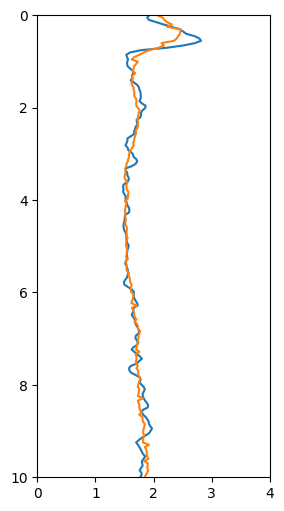

In [13]:
index = 0
reconstr = (dec_ic.predict(lat_ic[index:index+1])*ic_scale).reshape(-1)
plt.figure(figsize=(3,6))
plt.plot(ic_data[index],depth)
plt.plot(reconstr,depth)
plt.xlim(0,4)
plt.ylim(10,0)

In [14]:
df = pd.read_csv(f'{data_path}/RF_YN_Model5.csv') # some elevation values are off
df.loc[df.Elevation<0, 'Elevation'] = 0
print(len(df), 'CPT sites are in Durante data')
df = df.rename(columns={'Test ID':'LocationID','GWD (m)':'GWD','L (m)':'L','Slope (%)':'Slope','PGA (g)':'PGA'})
df.drop(columns=['easting__N','northing__','CM pred','4m_Qtn_med','4m_Qtn_std'],inplace=True)
df.LocationID = df.LocationID.astype(int)
df.loc[:,'L'] /= 1000
df = df.merge(lat_df,on='LocationID')
print(len(df), 'CPT sites are available after merging dataframe')
df.head()

6704 CPT sites are in Durante data
3364 CPT sites are available after merging dataframe


,LocationID,GWD,Elevation,L,Slope,PGA,4m_Qtncs_m,4m_Qtncs_s,4m_Ic_med,4m_Ic_std,...,qc_mean0,qc_mean1,qc_mean2,qc_mean3,qc_mean4,qc_mean5,qc_mean6,qc_mean7,qc_mean8,qc_mean9
0,15635,1.300896,1.123009,0.211770,0.905948,0.532398,123.393393,23.853785,1.625464,0.112291,...,71.545178,83.196404,141.912143,132.489149,136.738706,101.122349,163.600598,188.090333,166.791191,168.426502
1,15629,1.788212,2.044325,0.115795,0.451034,0.542307,135.790982,34.965532,1.626258,0.358778,...,208.309554,90.839380,78.439153,135.250671,153.233727,157.161214,153.389269,130.781458,169.334585,145.681153
2,183,1.637517,2.003797,0.137265,0.941866,0.545784,129.140240,38.641063,4.569982,0.434698,...,99.409728,130.376698,88.627708,95.030192,122.306925,127.153073,161.996564,161.017497,154.920753,214.928167
3,158,1.165643,0.992154,0.073885,2.699290,0.535794,94.733152,32.039927,1.766342,0.462708,...,51.074361,64.968353,64.981795,110.698636,135.187382,128.356074,145.316678,154.403033,158.910073,163.688144
4,180,2.121364,1.933611,0.119745,1.187781,0.528980,94.189786,9.524548,1.864985,0.162700,...,84.298722,86.210055,91.039188,79.534086,93.113679,102.568618,121.061958,153.377783,148.604742,159.275685


In [15]:
df.describe()

,LocationID,GWD,Elevation,L,Slope,PGA,4m_Qtncs_m,4m_Qtncs_s,4m_Ic_med,4m_Ic_std,...,qc_mean0,qc_mean1,qc_mean2,qc_mean3,qc_mean4,qc_mean5,qc_mean6,qc_mean7,qc_mean8,qc_mean9
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,...,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000
mean,15116.868609,2.094232,3.392214,0.990498,1.156838,0.447103,123.238725,27.717443,1.790182,0.286633,...,86.892658,106.088955,115.552413,121.843828,133.601159,145.210278,150.350780,152.206902,152.586444,155.910248
std,12062.015099,0.628342,1.243518,0.613716,1.121143,0.040721,32.312449,12.475239,0.342510,0.150587,...,37.352945,31.588721,35.868384,38.305877,42.026171,40.246171,35.713373,32.588892,30.533440,31.566218
min,3.000000,0.471677,0.000000,0.000000,0.000000,0.334670,57.903522,3.451498,1.211641,0.023036,...,32.956674,48.110116,53.571175,57.917491,57.038717,59.267279,61.552112,61.295226,62.882829,62.670595
25%,4496.750000,1.667939,2.415766,0.488527,0.480078,0.415512,100.593383,18.642077,1.584713,0.159210,...,61.752054,82.842897,87.760410,93.106613,99.641294,114.502790,126.032634,130.488448,132.803774,134.265059
50%,14049.500000,1.997451,3.405445,0.909829,0.841761,0.450090,118.564718,25.853287,1.698901,0.280772,...,76.150044,99.581521,109.980336,113.676697,128.773005,143.953001,149.267810,150.594870,151.109416,153.789805
75%,24661.250000,2.445162,4.331852,1.418687,1.393735,0.477369,143.993361,34.326771,1.870249,0.392476,...,98.723174,123.769363,137.767560,145.236891,162.964466,171.561913,171.025600,170.512544,170.215408,175.204533
max,57842.000000,5.453221,7.892973,3.289537,10.922902,0.561812,254.000000,88.860024,4.569982,0.834541,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000


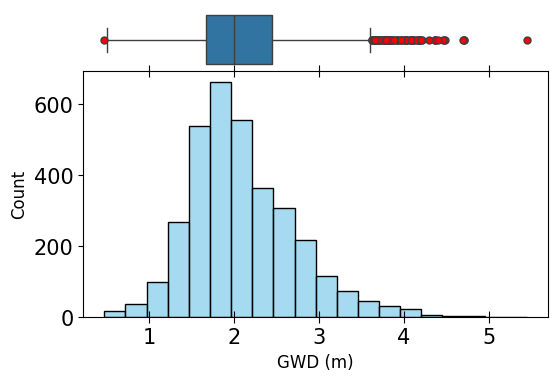

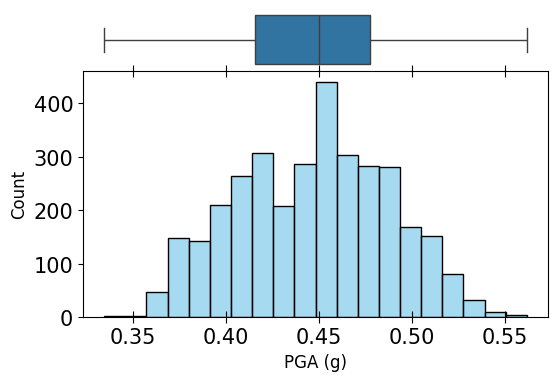

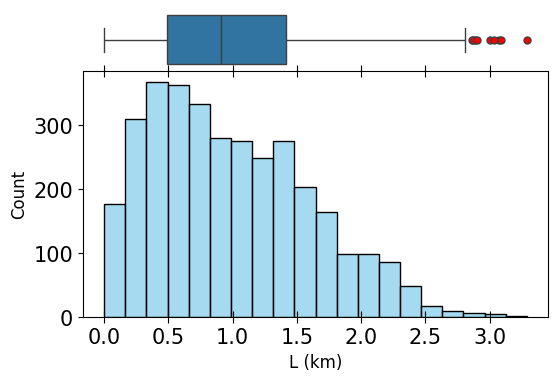

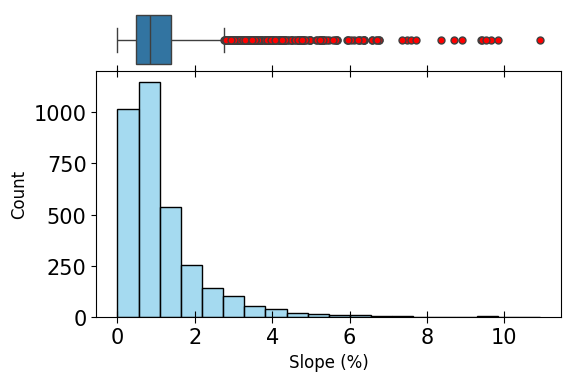

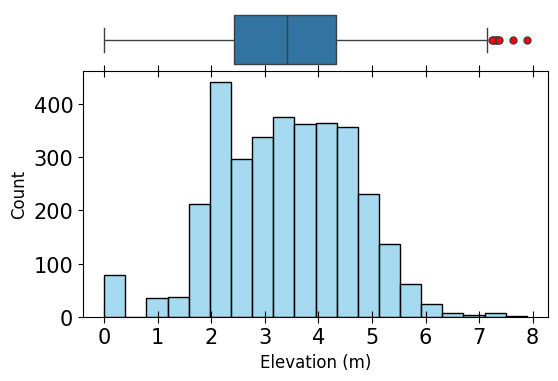

In [16]:
import matplotlib.gridspec as gridspec
basic_features = ['GWD', 'PGA', 'L', 'Slope', 'Elevation']
units = ['(m)','(g)','(km)','(%)','(m)']
for feature, unit in zip(basic_features,units):
    # Create a grid of subplots using gridspec
    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])

    # Plot the histogram in the top subplot
    ax1 = plt.subplot(gs[0])
    sns.boxplot(data=df[feature].values, ax=ax1, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5}, orient='h')
    ax1.set_xlabel(None)
    ax1.set_ylabel(None)
    ax1.set_yticks([])  # Remove y-ticks
    # Remove the boundary around the subplots
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)


    # Plot the box plot in the bottom subplot
    ax2 = plt.subplot(gs[1], sharex = ax1)
    sns.histplot(data=df[feature].values, ax=ax2, color='skyblue', bins=20)
    ax2.set_xlabel(f'{feature} {unit}', fontsize=12)  # Increase the font size of the x-axis label
    ax2.set_ylabel('Count', fontsize=12)  # Set the y-axis label to 'Count'
    # Show xticks on both top and bottom
    ax1.tick_params(axis='x', bottom=True, direction='inout')
    ax2.tick_params(axis='x', bottom=True, top=True, direction='inout', length=8, labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)


    # remove vertical gap between subplots
    plt.subplots_adjust(hspace=.0)

    # Show the plot
    plt.show()
    # plt.savefig(f'{output_path}/{feature}.png', dpi=200, bbox_inches='tight')


In [17]:
id_all = df.LocationID
y_all = df.Target
X_all = df.drop(columns=['LocationID','Target'])

In [18]:
X_train, X_valid_test, y_train, y_valid_test, id_train, id_valid_test = train_test_split(X_all, y_all, id_all, test_size=0.3, random_state=0)
X_valid, X_test, y_valid, y_test, id_valid, id_test, = train_test_split(X_valid_test, y_valid_test, id_valid_test, test_size=0.5, random_state=0)
print(y_train.value_counts())
print(y_valid.value_counts())
print(y_test.value_counts())

Target
0    1309
1    1045
Name: count, dtype: int64
Target
0    295
1    210
Name: count, dtype: int64
Target
0    273
1    232
Name: count, dtype: int64


# XGBoost

In [19]:
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
def xgb_training(X_train, y_train, X_test, y_test, max_depth, n_estimators):
    param_list = {'max_depth':max_depth,
                  'n_estimators':n_estimators,
                  'random_state':0,
                  'eval_metric':['aucpr','logloss','auc'],
                  'early_stopping_rounds':5
                 }
    eval_set = [(X_train, y_train), (X_test, y_test)]
    #eval_metric = ["auc","error"]
    xgb = xgboost.sklearn.XGBClassifier(**param_list,
                                            scale_pos_weight=sum(y_train==0)/sum(y_train==1), #scale_pos_weight = sum(n)/sum(p)
                                            # use_label_encoder=False
                                        )
    xgb.fit(X_train, y_train,eval_set=eval_set, verbose=0)
    return xgb

Model A: PGA, GWD, L, Slope, and Elevation (5)

Model B: Model A input + median and std of CPT (5+4)

Model C: Model A input + 1-m average CPT (5+20)

Model D: Model A input + latent features (5+20)

In [20]:
input_A = np.arange(5)
input_B = np.arange(9)
input_C = np.append(input_A,np.arange(29,49))
input_D = np.append(input_A,np.arange(9,29))

In [21]:
X_train.columns[input_D] # check the selected features

Index(['GWD', 'Elevation', 'L', 'Slope', 'PGA', 'Ic0', 'Ic1', 'Ic2', 'Ic3',
       'Ic4', 'Ic5', 'Ic6', 'Ic7', 'Ic8', 'Ic9', 'qc0', 'qc1', 'qc2', 'qc3',
       'qc4', 'qc5', 'qc6', 'qc7', 'qc8', 'qc9'],
      dtype='object')

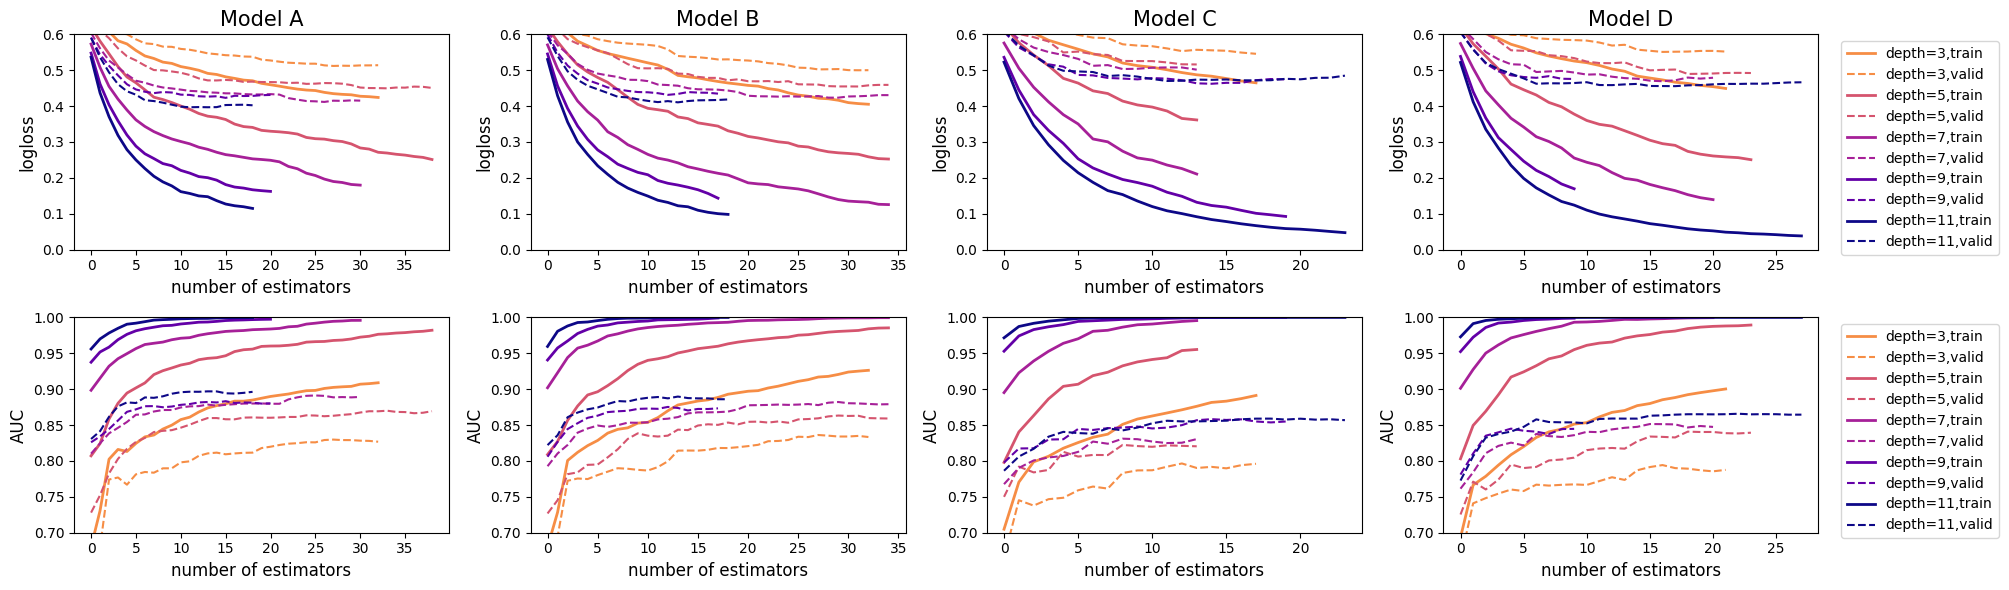

In [22]:
n_estimators = 100
fig, axes = plt.subplots(2,4,figsize=(20,6))
for max_depth in range(3,13,2):
    modelA = xgb_training(X_train.iloc[:,input_A], y_train, X_valid.iloc[:,input_A], y_valid, max_depth=max_depth, n_estimators=n_estimators)
    modelB = xgb_training(X_train.iloc[:,input_B], y_train, X_valid.iloc[:,input_B], y_valid, max_depth=max_depth, n_estimators=n_estimators)
    modelC = xgb_training(X_train.iloc[:,input_C], y_train, X_valid.iloc[:,input_C], y_valid, max_depth=max_depth, n_estimators=n_estimators)
    modelD = xgb_training(X_train.iloc[:,input_D], y_train, X_valid.iloc[:,input_D], y_valid, max_depth=max_depth, n_estimators=n_estimators)
    for model, title, col in zip([modelA, modelB, modelC,modelD], ['Model A','Model B','Model C','Model D'],[0,1,2,3]):
        cmap = plt.cm.plasma_r((max_depth)/11)
        axes[0,col].plot(model.evals_result_['validation_0']['logloss'], c=cmap,lw=2,label=f'depth={max_depth},train')
        axes[0,col].plot(model.evals_result_['validation_1']['logloss'], c=cmap,ls='--',label=f'depth={max_depth},valid')
        axes[0,col].set_xlabel('number of estimators',fontsize=12)
        axes[0,col].set_ylabel('logloss',fontsize=12)
        axes[0,col].set_ylim(0,0.6)
        axes[0,col].set_title(title, fontsize=15)

        axes[1,col].plot(model.evals_result_['validation_0']['auc'], c=cmap,lw=2,label=f'depth={max_depth},train')
        axes[1,col].plot(model.evals_result_['validation_1']['auc'], c=cmap,ls='--',label=f'depth={max_depth},valid')
        axes[1,col].set_xlabel('number of estimators',fontsize=12)
        axes[1,col].set_ylabel('AUC',fontsize=12)
        axes[1,col].set_ylim(0.7,1)
axes[0,3].legend(bbox_to_anchor=(1.5, 1))
axes[1,3].legend(bbox_to_anchor=(1.5, 1))
plt.tight_layout()

In [23]:
# optimized xgb
modelA = xgb_training(X_train.iloc[:,input_A], y_train, X_valid.iloc[:,input_A], y_valid, max_depth=11, n_estimators=100)
modelB = xgb_training(X_train.iloc[:,input_B], y_train, X_valid.iloc[:,input_B], y_valid, max_depth=11, n_estimators=100)
modelC = xgb_training(X_train.iloc[:,input_C], y_train, X_valid.iloc[:,input_C], y_valid, max_depth=11, n_estimators=100)
modelD = xgb_training(X_train.iloc[:,input_D], y_train, X_valid.iloc[:,input_D], y_valid, max_depth=11, n_estimators=100)

Accuracy: 79.41%
Accuracy: 81.58%
Accuracy: 80.20%
Accuracy: 83.37%


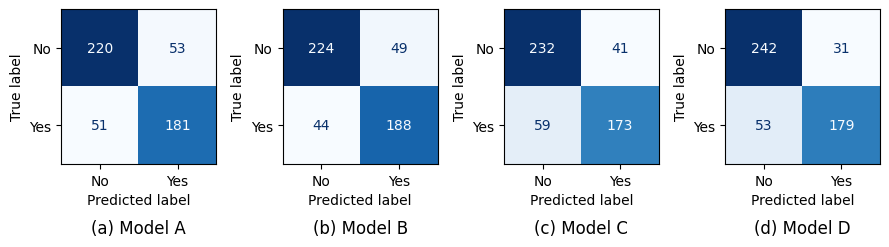

In [24]:
# make prediction
cha = ['(a)', '(b)','(c)','(d)']
fig, ax = plt.subplots(1,4,figsize=(9,4))
for model, test_data, title, col in zip([modelA, modelB, modelC, modelD], [X_test.iloc[:,input_A], X_test.iloc[:,input_B], X_test.iloc[:,input_C], X_test.iloc[:,input_D]], ['Model A','Model B','Model C', 'Model D'], [0, 1, 2, 3]):
  preds = model.predict(test_data)
  y_pred = [round(value) for value in preds]
  # evaluate predictions
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  ax[col].set_title(cha[col]+' '+title,fontsize=12,y=-0.5)
  #ax[1,col].set_title(title,fontsize=12)
  ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, ax=ax[col], cmap=plt.cm.Blues, display_labels=['No','Yes'], colorbar=False,)
  #ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, ax=ax[1,col], cmap=plt.cm.Blues, normalize='true', display_labels=['No','Yes'], colorbar=False)
plt.tight_layout()
plt.savefig(f'{output_path}/confusion_matrix.png',dpi=300)
plt.show()

In [25]:
print(modelA.best_iteration)
print(modelB.best_iteration)
print(modelC.best_iteration)
print(modelD.best_iteration)

13
13
18
22


In [26]:
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, accuracy_score, balanced_accuracy_score
def scoring(model, X, y_true):
    y_pred = model.predict(X)
    roc_auc = roc_auc_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    bacc = balanced_accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true,y_pred)
    scores = np.array([acc,bacc,precision[1],precision[0],recall[1],recall[0],f1[1],f1[0],roc_auc])
    return scores

In [27]:
score_test = pd.DataFrame(index=['Accuracy','bACC','Precision-Yes','Precision-No','Recall-Yes','Recall-No','F1-Yes','F1-No','ROC-AUC'])
score_test['Model A'] = scoring(modelA, X_test.iloc[:,input_A], y_test)
score_test['Model B'] = scoring(modelB, X_test.iloc[:,input_B], y_test)
score_test['Model C'] = scoring(modelC, X_test.iloc[:,input_C], y_test)
score_test['Model D'] = scoring(modelD, X_test.iloc[:,input_D], y_test)
score_test.style.background_gradient(cmap='RdYlGn',vmin=0.5,vmax=1).format(precision=3)

,Model A,Model B,Model C,Model D
Accuracy,0.794,0.816,0.802,0.834
bACC,0.793,0.815,0.798,0.829
Precision-Yes,0.774,0.793,0.808,0.852
Precision-No,0.812,0.836,0.797,0.820
Recall-Yes,0.780,0.810,0.746,0.772
Recall-No,0.806,0.821,0.850,0.886
F1-Yes,0.777,0.802,0.776,0.810
F1-No,0.809,0.828,0.823,0.852
ROC-AUC,0.793,0.815,0.798,0.829


# SHAP

## Global Explanation

/Users/clawsy/Documents/geoelements_dev/xai-cpt/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


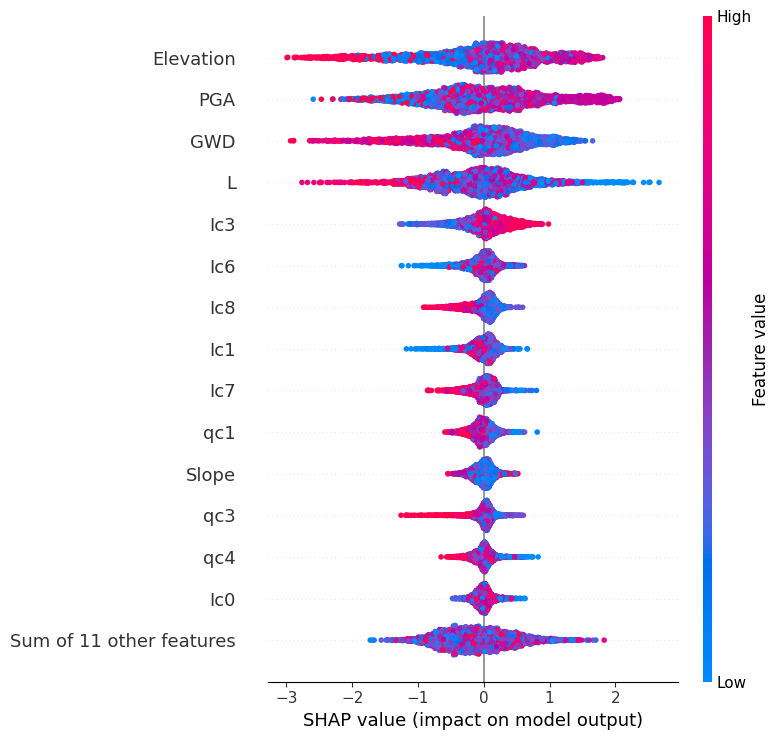

In [28]:
import shap
# explain the model's predictions using SHAP
# compute SHAP values
explainer = shap.TreeExplainer(modelD)
expected_value = explainer.expected_value
shap_values = explainer(X_all.iloc[:,input_D])

# summarize the effects of all the features
shap.plots.beeswarm(shap_values,max_display=15, show=False)
plt.tight_layout()
plt.savefig(f'{output_path}/global_shap.png',dpi=300)
plt.show()

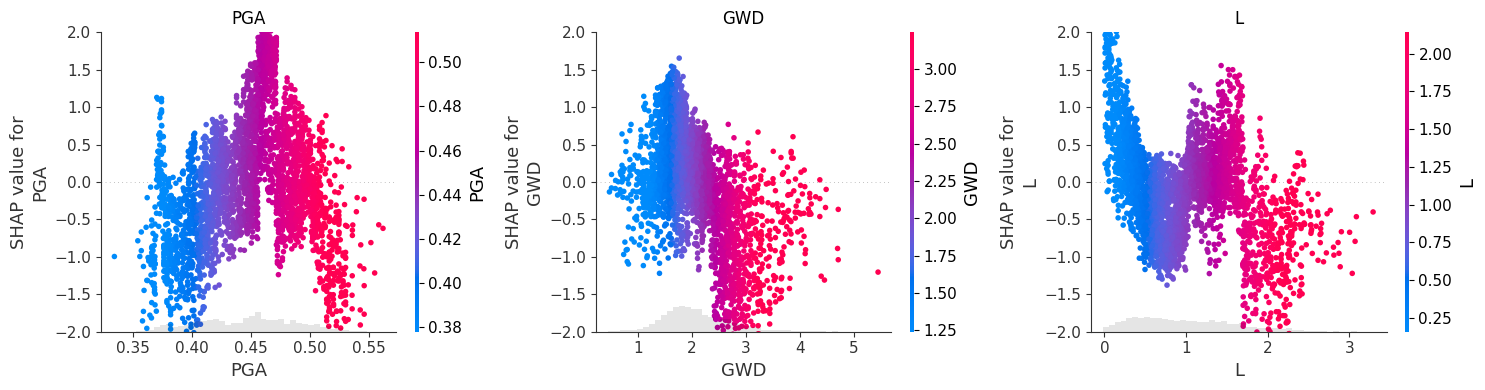

In [29]:
titles = ['PGA','GWD','L']
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in range(3):
  shap.plots.scatter(shap_values[:,titles[i]], color=shap_values[:,titles[i]], ax=ax[i], show=False)
  ax[i].set_title(titles[i],fontsize=12)
  ax[i].set_ylim(-2,2)
plt.tight_layout()
plt.show()

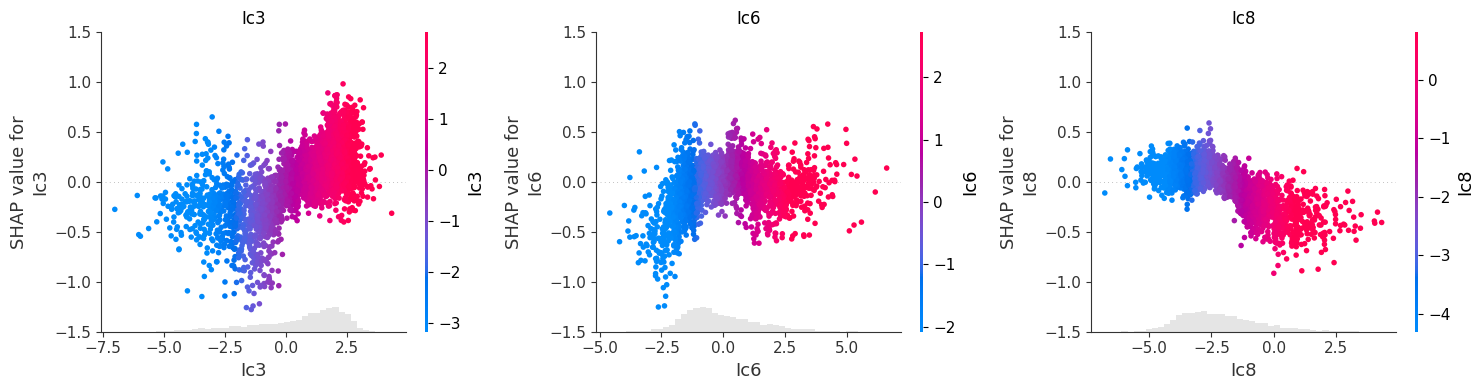

In [30]:
titles = ['Ic3','Ic6','Ic8']
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in range(3):
  shap.plots.scatter(shap_values[:,titles[i]], color=shap_values[:,titles[i]], ax=ax[i], show=False)
  ax[i].set_title(titles[i],fontsize=12)
  ax[i].set_ylim(-1.5,1.5)
plt.tight_layout()
plt.show()

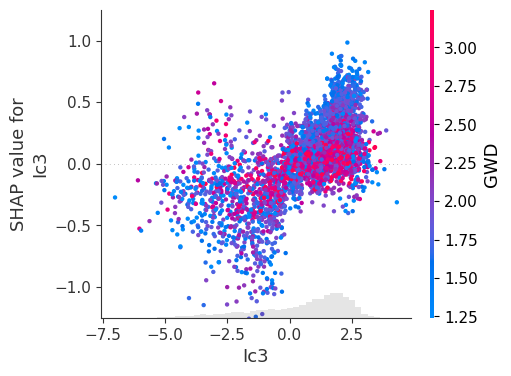

In [31]:
fig, ax = plt.subplots(figsize=(5,4))
shap.plots.scatter(shap_values[:,'Ic3'], color=shap_values[:,'GWD'], ax=ax, show=False, alpha=1, dot_size=10)
ax.set_ylim(-1.25,1.25)
# ax.set_xlim(-4,4)
plt.show()

## Local Explanation

# Decode latent features

In [32]:
feature_name = 'Ic3'
# mask = (X_all[feature_name]>2.4) & (X_all[feature_name]<2.5)
mask = (X_all[feature_name]>-4.5) & (X_all[feature_name]<-4.0)
sample_profile = X_all[mask].iloc[:,9:29]
decoded_ic = dec_ic.predict(sample_profile.iloc[:,0:10]).reshape(len(sample_profile),-1)*ic_scale
decoded_qc = dec_qc.predict(sample_profile.iloc[:,10:20]).reshape(len(sample_profile),-1)*qc_scale

2/2 [==============================] - 0s 1ms/step


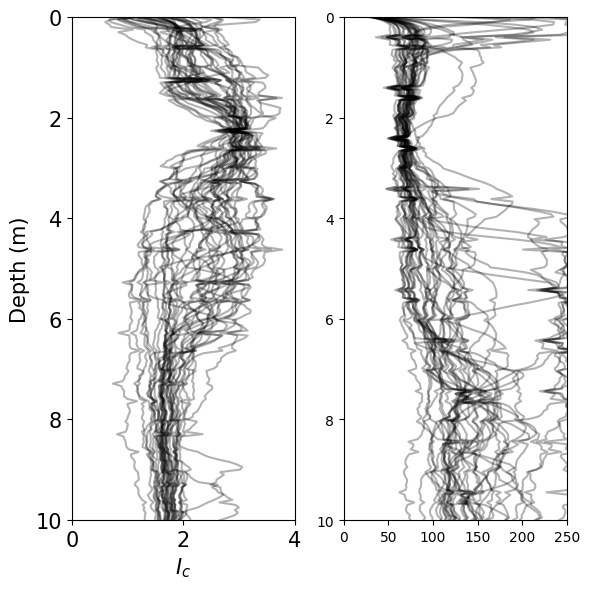

In [33]:
fig, ax = plt.subplots(1,2,figsize=(6,6))
# ax[0].set_xticklabels('',fontsize=15)
# norm = mpl.colors.Normalize(vmin=sample_profile['Ic3'].min(), vmax=sample_profile['Ic3'].max())
# cmap = mpl.colormaps['coolwarm']
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
for i in range(len(sample_profile)):
    # ax[0].plot(decoded_ic[i],depth, color=cmap(norm(sample_profile.iloc[i,3])))
    ax[0].plot(decoded_ic[i],depth, color='k', alpha=0.3)
    ax[1].plot(decoded_qc[i],depth, color='k', alpha=0.3)
ax[0].set_xlim(0,4)
ax[0].set_ylim(10,0)
ax[0].set_xlabel('$I_c$', fontsize=15)
ax[0].set_ylabel('Depth (m)', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].set_xlim(0,250)
ax[1].set_ylim(10,0)
plt.tight_layout()
plt.show()

In [34]:
mean_ic_qc = X_all.iloc[:,9:29].mean().values
ic_mean = mean_ic_qc[:10]
qc_mean = mean_ic_qc[10:]
std_ic_qc = X_all.iloc[:,9:29].std().values
ic_std = std_ic_qc[:10]
qc_std = std_ic_qc[10:]

In [35]:
import matplotlib as mpl

In [36]:
index = 3
ref_value = 0
interval = 20
vmin = -4
vmax = 4
which = 'ic'
if which == 'ic':
  label = '$I_c$'
  scale = ic_scale
  mean = ic_mean
  std = ic_std
  dec = dec_ic
  xmin=-1
  xmax=1
  xlim = 4
else:
  label = '$q_c1ncs$'
  scale = qc_scale
  mean = qc_mean
  std = qc_std
  dec = dec_qc
  xmin=-100
  xmax=100
  xlim=254

value_range = np.linspace(vmin,vmax,interval)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.colormaps['coolwarm']
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

iters = 100

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.colormaps['coolwarm']
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

ref_lat = np.random.normal(mean,std,(iters,10))

ref_lat[:,index] = ref_value
ref = (dec.predict(ref_lat, verbose=0)*scale).reshape(iters,200)
d_value = np.zeros((interval,200))
for i in range(iters):
  sample = np.tile(ref_lat[i],(interval,1))
  sample[:,index] = value_range
  decoded = dec.predict(sample, verbose=0).reshape(interval,200)*scale
  d_value += decoded - ref[i]

75 42
2/2 [==============================] - 0s 1ms/step


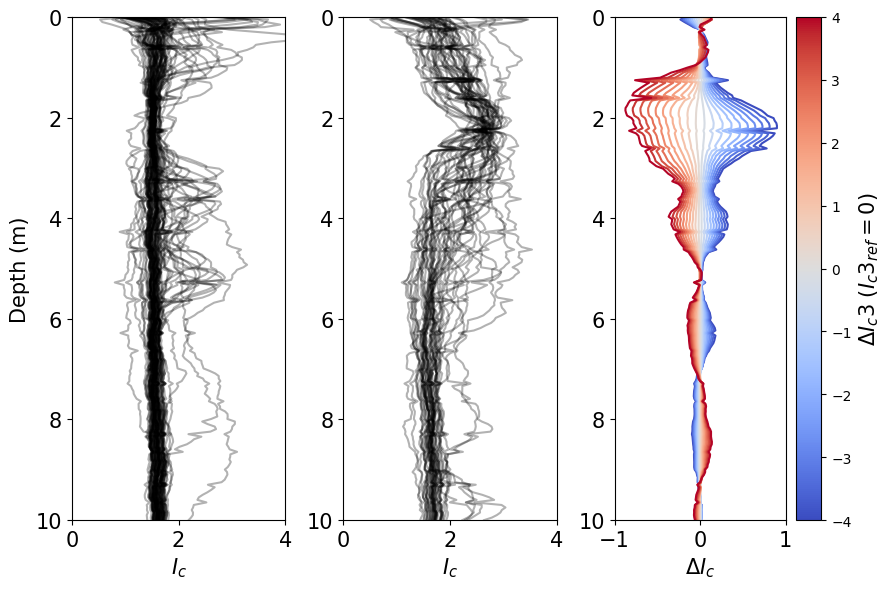

In [37]:
feature_name = 'Ic3'
mask1 = (X_all[feature_name]>2.4) & (X_all[feature_name]<2.5)
mask2 = (X_all[feature_name]>-2.5) & (X_all[feature_name]<-2.3)
sample_profile1 = X_all[mask1].iloc[:,9:29]
sample_profile2 = X_all[mask2].iloc[:,9:29]
print(len(sample_profile1),len(sample_profile2))
decoded_ic1 = dec_ic.predict(sample_profile1.iloc[:,0:10]).reshape(len(sample_profile1),-1)*ic_scale
decoded_ic2 = dec_ic.predict(sample_profile2.iloc[:,0:10]).reshape(len(sample_profile2),-1)*ic_scale

fig, ax = plt.subplots(1,3,figsize=(9,6))
for j in range(len(sample_profile1)):
    ax[0].plot(decoded_ic1[j],depth, color='k', alpha=0.3)
ax[0].set_xlim(0,4)
ax[0].set_ylim(10,0)
ax[0].set_xlabel('$I_c$', fontsize=15)
ax[0].set_ylabel('Depth (m)', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=15)

for j in range(len(sample_profile2)):
    ax[1].plot(decoded_ic2[j],depth, color='k', alpha=0.3)
ax[1].set_xlim(0,4)
ax[1].set_ylim(10,0)
ax[1].set_xlabel('$I_c$', fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)

for i in range(interval):
  ax[2].plot(d_value[i]/iters, depth, color=cmap(norm(value_range[i])))
ax[2].set_xlim(xmin,xmax)
ax[2].set_ylim(10,0)
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[2].set_xlabel('${\Delta}I_c$', fontsize=15)
# ax[1].set_ylabel('Depth (m)', fontsize=15)
cbar = plt.colorbar(sm, ax=ax[2], location='right')
cbar.ax.set_ylabel('${\Delta}I_{c}3$ ($I_{c}3_{ref}=0$)', rotation=90, fontsize=15)

plt.tight_layout()
plt.savefig(f'{output_path}/ic3.png', dpi=200)
plt.show()

### Local

In [38]:
# only analyse testing data
explainer = shap.TreeExplainer(modelD)
expected_value = explainer.expected_value
shap_values = explainer(X_test.iloc[:,input_D])
y_pred = modelD.predict(X_test.iloc[:,input_D])
y_true = y_test.values

In [39]:
tp = (y_pred==y_true) & (y_pred==1)
tn = (y_pred==y_true) & (y_pred==0)
fp = (y_pred!=y_true) & (y_pred==1)
fn = (y_pred!=y_true) & (y_pred==0)

In [40]:
id_test[tp]

1790     4048
2931    21575
1813     2192
1602    26057
1593     4493
        ...  
1865     4530
1523     2201
1262     2764
1712     3902
361        83
Name: LocationID, Length: 179, dtype: int64

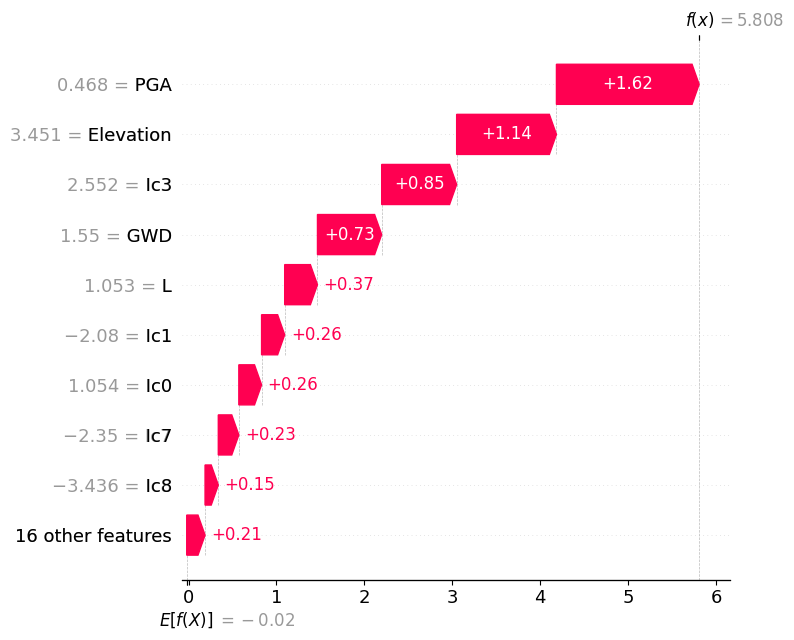

Location ID 4048


In [41]:
loc_id = id_test.values[tp][0] #[tn][6]
shap.plots.waterfall(shap_values[tp][0],show=False)
plt.tight_layout()
plt.savefig(f'{output_path}/{loc_id}_shap.png',dpi=200)
plt.show()
print('Location ID', loc_id)

In [42]:
# find index for loc_id
index = np.where(id_data == loc_id)[0][0]

1/1 [==============================] - 0s 137ms/step


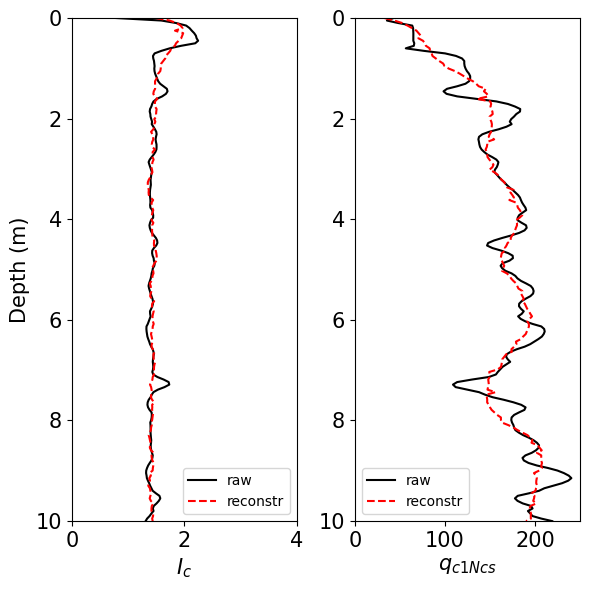

In [43]:
fig, ax = plt.subplots(1,2,figsize=(6,6))
# plot original profile
ax[0].plot(ic_data[index],depth, color='k', label='raw')
ax[1].plot(qc_data[index],depth, color='k', label='raw')
reconstr_ic = (sae_ic.predict((ic_data[index].reshape(1,10,20))/ic_scale)*ic_scale).reshape(-1)
reconstr_qc = (sae_qc.predict((qc_data[index].reshape(1,10,20))/qc_scale)*qc_scale).reshape(-1)
#plot reconstructed profile
ax[0].plot(reconstr_ic,depth, 'r--', label='reconstr')
ax[1].plot(reconstr_qc,depth, 'r--', label='reconstr')
ax[0].set_xlim(0,4)
ax[0].set_ylim(10,0)
ax[0].set_xlabel('$I_c$', fontsize=15)
ax[0].set_ylabel('Depth (m)', fontsize=15)
ax[1].set_xlabel('$q_{c1Ncs}$', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].set_xlim(0,250)
ax[1].set_ylim(10,0)
plt.tight_layout()
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig(f'{output_path}/{loc_id}_profile.png',dpi=300)
plt.show()

### Supplements

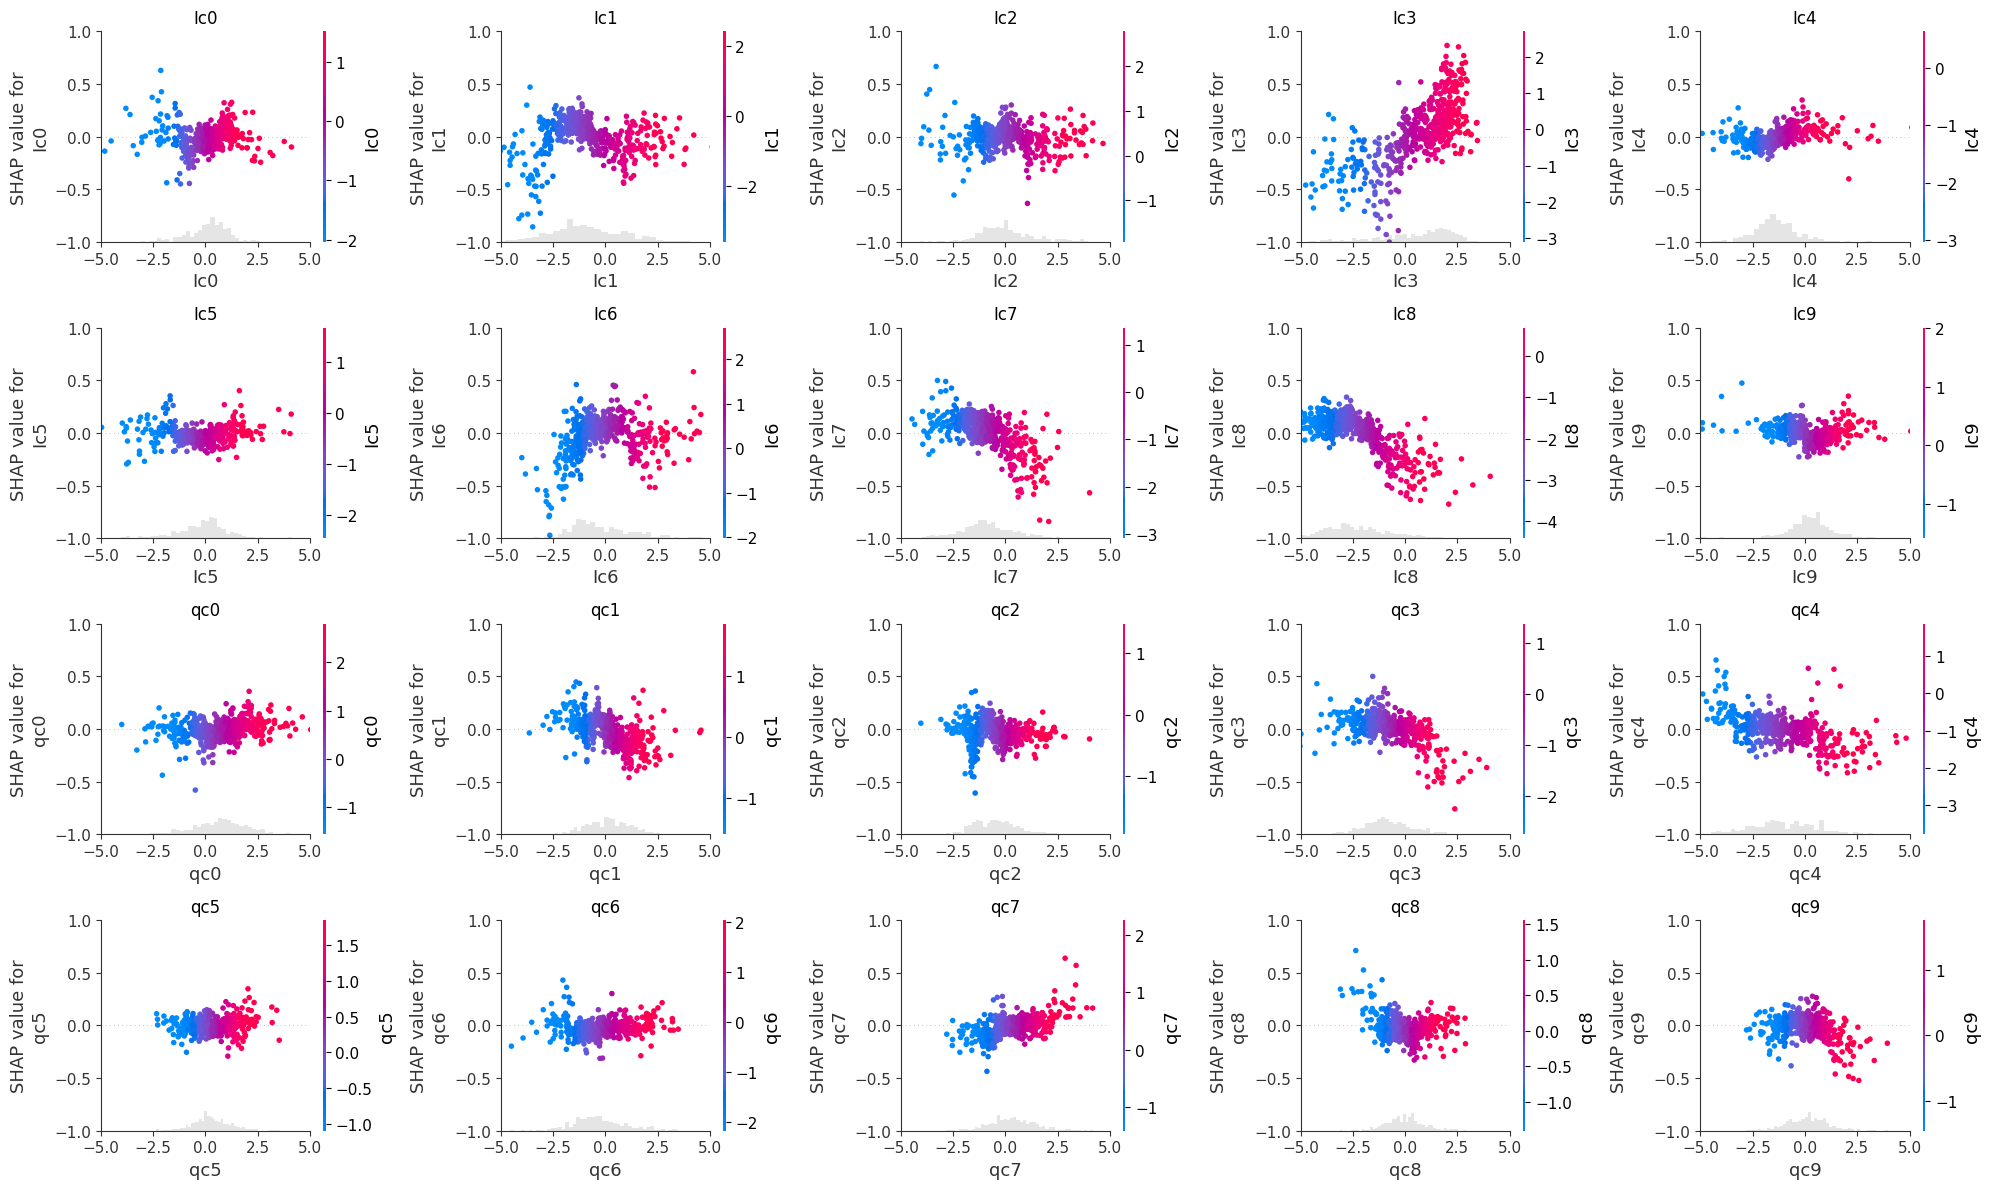

In [44]:
fig, ax = plt.subplots(4,5,figsize=(20,12))
for row in range(4):
  for col in range(5):
    num = (row%2)*5+col
    if row < 2:
      title = 'Ic'+str(num)
    else:
      title = 'qc'+str(num)
    shap.plots.scatter(shap_values[:,title], color=shap_values[:,title], ax=ax[row,col], show=False)
    ax[row,col].set_title(title,fontsize=12)
    ax[row,col].set_ylim(-1.,1)
    ax[row,col].set_xlim(-5,5)
plt.tight_layout()
plt.show()

Ic3 done
Ic8 done
Ic1 done
Ic6 done
Ic7 done
Ic0 done
Ic2 done
Ic9 done
Ic4 done
Ic5 done
qc1 done
qc4 done
qc3 done
qc2 done
qc9 done
qc8 done
qc0 done
qc7 done
qc6 done
qc5 done


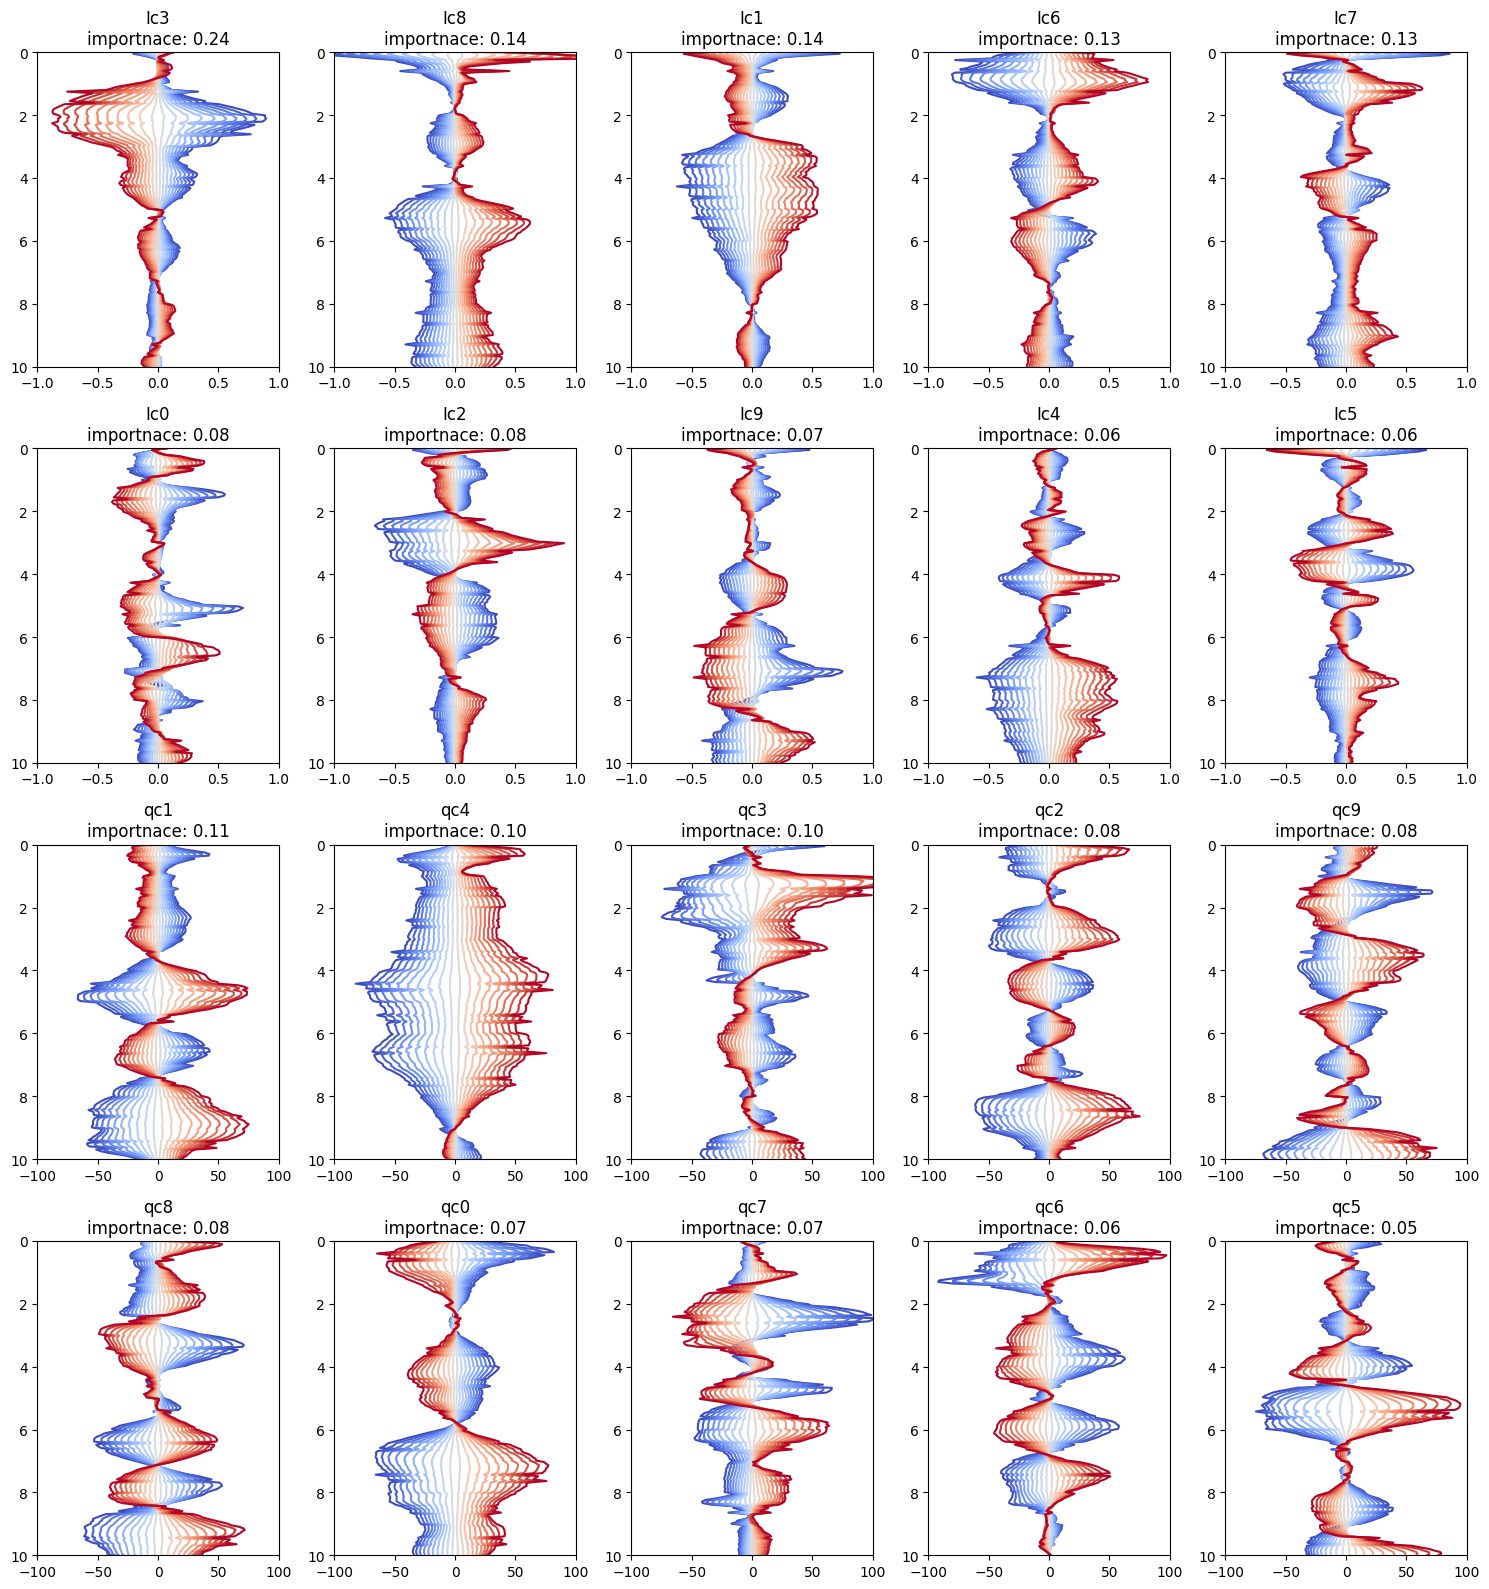

In [45]:
importances = np.mean(abs(shap_values.values),axis=0)[5:]
iters = 10
sort = True
order = np.arange(10)
fig, ax = plt.subplots(4,5,figsize=(15,16))
for features in range(20):
  row = features//5
  col = features%5
  num = features%10
  ref_value = 0
  interval = 20
  if row < 2:
    title = 'Ic'
    label = '$I_c$'
    scale = ic_scale
    mean = ic_mean
    std = ic_std
    dec = dec_ic
    xmin=-1
    xmax=1
    xlim = 4
    if sort:
      order = np.argsort(importances[:10])[::-1]
    importance = importances[:10][order][num]
  else:
    title = 'qc'
    label = '$q_c1ncs$'
    scale = qc_scale
    mean = qc_mean
    std = qc_std
    dec = dec_qc
    xmin=-100
    xmax=100
    xlim=254
    if sort:
      order = np.argsort(importances[10:])[::-1]
    importance = importances[10:][order][num]

  index = order[num]
  title = title+str(index)
  vmin = -4
  vmax = 4
  norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
  cmap = mpl.colormaps['coolwarm']
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

  #ϵ = np.random.random((iters,10))*4-2 # +-2 std
  #ref_lat = mean + std*ϵ
  ref_lat = np.random.normal(mean,std,(iters,10))
  ref_lat[:,index] = 0 #mean[index]
  ref = (dec.predict(ref_lat, verbose=0)*scale).reshape(iters,200)
  d_value = np.zeros((interval,200))
  for i in range(iters):
    sample = np.tile(ref_lat[i],(interval,1))
    sample[:,index] = value_range
    decoded = dec.predict(sample, verbose=0).reshape(interval,200)*scale
    d_value += decoded - ref[i]
  for i in range(interval):
    ax[row,col].plot(d_value[i]/iters, depth, color=cmap(norm(value_range[i])))
  ax[row,col].set_xlim(xmin,xmax)
  ax[row,col].set_ylim(10,0)
  ax[row,col].set_title(f'{title}\nimportnace: {importance:.2f}')
  print(title+' done')
  #plt.colorbar(sm, ax=ax[row,col], location='bottom')
plt.tight_layout()
plt.show()